# Übungszettel 5: Clustering (Musterlösung)

## Maschinelles Lernen - WiSe 23/24

### Abgabe 22.11.2023, 23:55 Uhr

*Hinweise:*
- Übungsaufgaben **müssen** in Gruppen von 3-4 Personen abgegeben werden. **Einzelabgaben werden nicht korrigiert bzw. bewertet.**
- Es wird pro Übungszettel nur eine Aufgabe bewertet, die übrigen Aufgaben dienen zur selbstständigen Vertiefung des Vorlesungsstoffs. Für diese Aufgaben werden nach der Abgabe Musterlösungen bereitgestellt.
- Die Lösungen sollen in diesem IPython Notebook realisiert werden, wobei Teilaufgaben und Zwischenergebnisse ausgegeben bzw. visualisiert werden sollen.
- Für die Abgabe sollen Sie dieses IPython Notebook und ggf. zugehörige Dateien in ein **Ziparchiv** packen und im Ilias hochladen. Das Ziparchiv soll nach folgendem Muster benannt werden:
`UebungXX_Nachname1_Nachname2_Nachname3.zip`, wobei die Nachnamen in alphabetischer Reihenfolge angegeben und Umlaute ggf. ersetzt werden sollen. Bei Nichtbefolgung dieser Vorgabe können Punkte abgezogen werden.

---

## Aufgabe 1: K-Means++

a) Implementieren Sie eine Funktion `k_means(data, k)`, die den K-means-Algorithmus auf ein Numpy-Array mit Objektkoordinaten anwendet und die Clusterzuordnung jedes Punktes sowie die Clusterzentren zurückliefert. Verwenden Sie keine Bibliotheken wie `sklearn`, sondern setzen Sie den in der Vorlesung vorgestellten Algorithmus um.

In [2]:
import numpy as np

def k_means(samples, k, initialization):
    
    # Random Initialization (Task a)
    if isinstance(initialization, str) and initialization == 'random':
        print("Random Initialization")
        cluster_means = np.zeros([k, samples.shape[1]])
        for i, (mins, maxs) in enumerate(zip(samples.min(axis=0), samples.max(axis=0))):
            cluster_means[:, i] = np.random.uniform(low=mins, high=maxs, size=(k))
        
        # print(cluster_means)
        ds = np.asarray([np.linalg.norm(mean - samples, axis=1) for mean in cluster_means])
        clusters = np.argmin(ds.T, axis=1)
    
    # K-Means++ Initialization (Task b)
    elif isinstance(initialization, str) and initialization == '++':
        print("K-Means ++ Initialization")
        
        start_id = np.random.choice([i for i,_ in enumerate(samples)]) 
        cluster_means = [samples[start_id]]
        for _ in range(1, k):
            D2 = np.array([min([np.inner(c-s,c-s) for c in cluster_means]) for s in samples])
            probs = D2/D2.sum()
            cumprobs = probs.cumsum()
            r = np.random.rand()
            for j,p in enumerate(cumprobs):
                if r < p:
                    i = j
                    break
            cluster_means.append(samples[i])
        
        cluster_means = np.array(cluster_means)
        
        ds = np.asarray([np.linalg.norm(mean - samples, axis=1) for mean in cluster_means])
        clusters = np.argmin(ds.T, axis=1)
    
    # Initialization from array (not required)
    elif isinstance(initialization, np.ndarray):
        print("Preset Initialization")
        clusters = initialization
    
    old_clusters = np.zeros_like(clusters)
    
    while not np.array_equal(old_clusters, clusters):
        old_clusters = clusters
        
        cluster_groups = [np.where(clusters == c)[0] for c in range(k)]
        for i, idx in enumerate(cluster_groups):
            if samples[idx].shape[0] > 0:
                cluster_means[i, :] = np.asarray(samples[idx].mean(axis=0))

        ds = np.asarray([np.linalg.norm(mean - samples, axis=1) for mean in cluster_means])
        clusters = np.argmin(ds.T, axis=1)
    
    return clusters, cluster_means

b) Ergänzen Sie Ihre Funktion um einen weiteren Parameter `initialization`, über den spezifiziert wird, wie die Cluster initialisiert werden. Implementierne Sie folgende Fälle:
- `initialization == 'random'`: zufällige Cluster-Initialisierung zwischen dem Minimum und Maximum der Daten
- `initialization == '++'`: Cluster-Initialisierung von K-Means++ (siehe https://en.wikipedia.org/wiki/K-means%2B%2B)
<!-- - `type(initialization) == np.array`: Initialisierung mit dem übergebenen Array -->

In [ ]:
# Siehe Lösung zu a)

c) Lesen Sie die Datei `clustering.csv` ein und wenden Sie Ihre K-Means-Implementierung für $k=6$ an. 

Führen Sie jedes der folgenden Clusterings mindestens fünf Mal durch und visualisieren Sie die jeweiligen Ergebnisse als Scatterplots, in denen erkennbar ist, welcher Punkt zu welchem Cluster gehört.

1. Ihre Implementierung mit zufälliger Initialisierung 
2. Die Implementierung aus `sklearn` mit zufälliger Initialisierung
3. Ihre Implementierung mit K-Means++-Initialisierung
4. Die Implementierung aus `sklearn` mit K-Means++-Initialisierung

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


def plot_predictions(samples_df, predictions):
    plots = len(predictions)
    
    fig, axs = plt.subplots(1, plots)
    fig.set_size_inches(18, 7)
    
    for p, (labels, centers) in enumerate(predictions):
        
        colors = cm.nipy_spectral(labels.astype(float) / centers.shape[0])
        
        axs[p].scatter(samples_df.values[:, 0], samples_df.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                       c=colors, edgecolor='k')

        axs[p].scatter(centers[:, 0], centers[:, 1], marker='o',
                       c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            axs[p].scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                           s=50, edgecolor='k')
            
    plt.show()

In [7]:
df = pd.read_csv("clustering.csv", header=None)
k = 6

Random Initialization
Random Initialization
Random Initialization
Random Initialization
Random Initialization


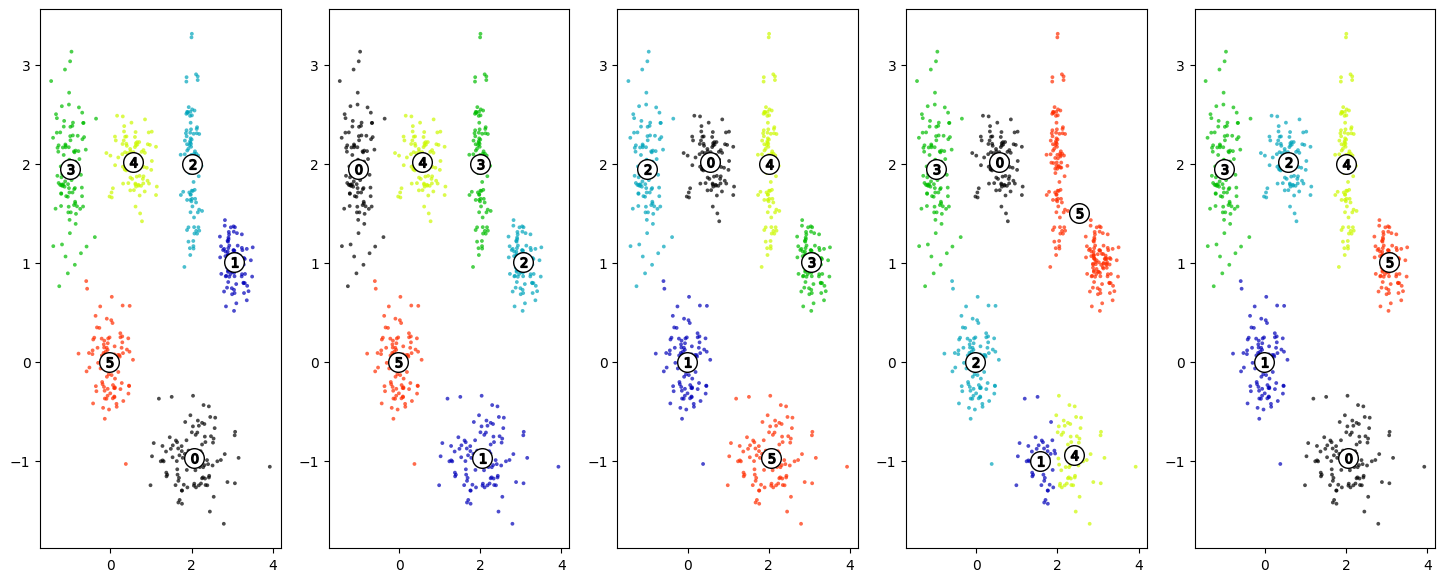

In [8]:
predictions = []
for i in range(5):
    predictions.append(k_means(df.values, k=k, initialization="random"))
plot_predictions(df, predictions)

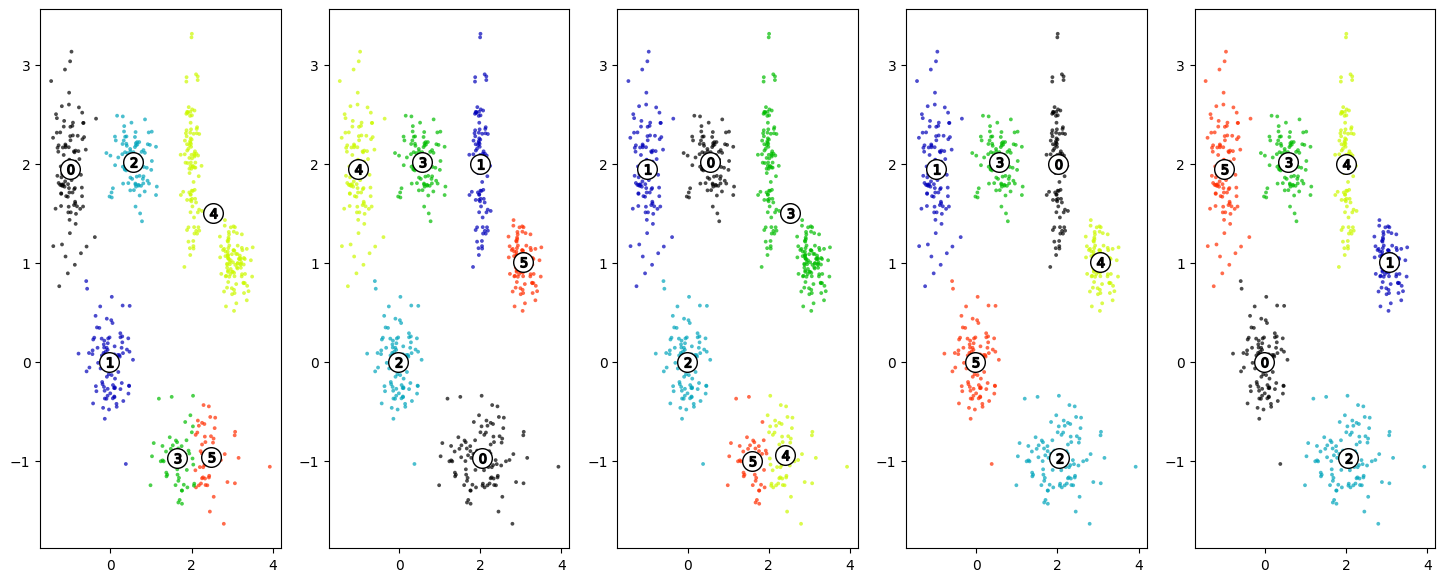

In [9]:
predictions = []
for i in range(5):
    estimator = KMeans(init='random', n_clusters=k, n_init=1)
    predictions.append((estimator.fit_predict(df.values), estimator.cluster_centers_))
plot_predictions(df, predictions)

K-Means ++ Initialization
K-Means ++ Initialization
K-Means ++ Initialization
K-Means ++ Initialization
K-Means ++ Initialization


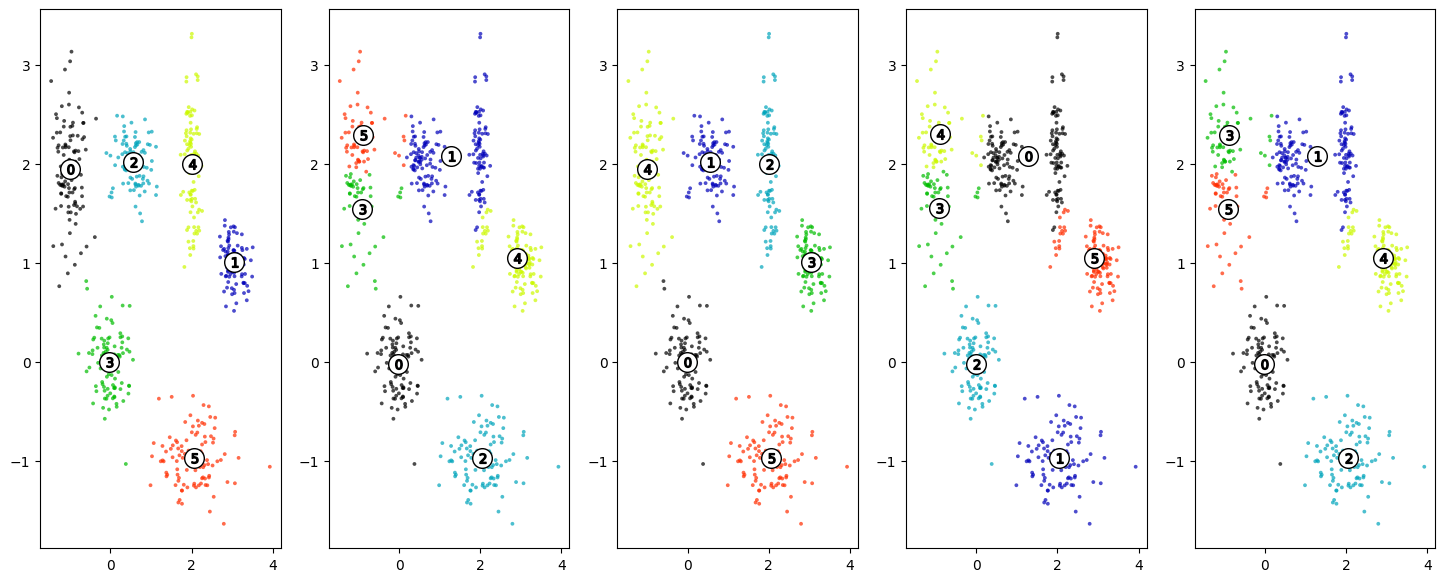

In [10]:
predictions = []
for i in range(5):
    predictions.append(k_means(df.values, k=k, initialization="++"))
plot_predictions(df, predictions)

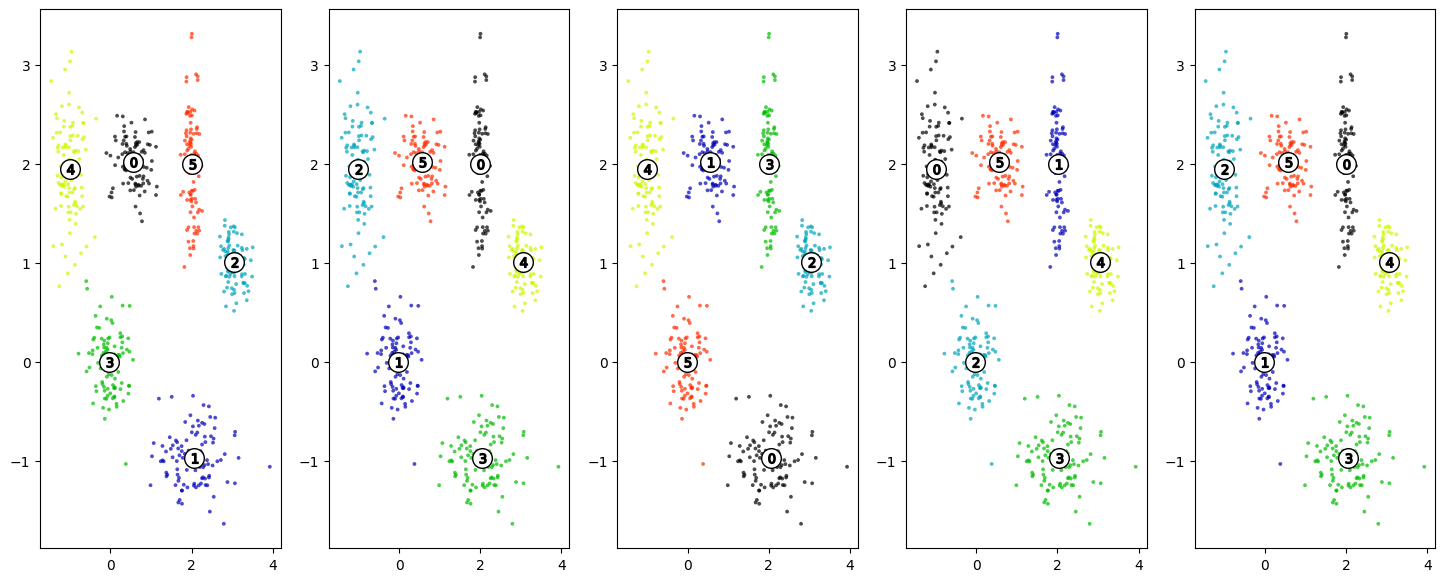

In [11]:
predictions = []
for i in range(5):
    estimator = KMeans(init='k-means++', n_clusters=k, n_init=1)
    predictions.append((estimator.fit_predict(df.values), estimator.cluster_centers_))
plot_predictions(df, predictions)

---
## Aufgabe 2: Dichte-basiertes Clustering (0,5+0,5+3,5+0,5 Punkte)

a) Beschreiben Sie kurz, wann dichte-basierte Clusteringverfahren eingesetzt werden und welche Vorteile und Nachteile es gibt.

Dichte-basierte Clusteringverfahren werden bei nicht-konvexen Clustern benötigt. Während distanzbasierte Verfahren nämlich ausschließlich konvexe Cluster erzeugen, können dichte-basierte Verfahren Cluster von beliebiger Form zurückliefern. Neben dieser Tatsache ist es ein weiterer Vorteil, dass die Anzahl an Clustern nicht im Vorhinein gewählt werden muss. Problematisch ist bei solchen Verfahren allerdings, dass definiert werden muss, wie dicht Punkte beieinander liegen müssen, um im selben Cluster zu sein (bei *DBScan* etwa $\epsilon$ und ${MinPts}$). Die Daten dürfen auch keine fehlenden Werte aufweisen, da die Dichte dann nicht mehr repräsentativ ist.

b) Erklären Sie den Unterschied zwischen dichte-erreichbaren und dichte-verbundenen Punkten (z.B. anhand einer Skizze). 

<img src="DBSCAN-Illustration.svg" width="300">

Rote Punkte haben eine ausreichend hohe Punktdichte ($MinPts$) in ihrer Umgebung (Radius $\epsilon$) und werden als Kernpunkte bezeichnet. Die gelben Punkte hingegen liegen zwar im Radius eines Kernpunktes, erfüllen selbst nicht die Mindestanzahl an Punkten $MinPts$ innerhalb des Radius $\epsilon$ und werden auch als Randpunkte bezeichnet. Punkte die gar keine Punkte in ihrer Umgebung (Radius $\epsilon$) haben, gehören zu keinem Cluster und werden als Noise bezeichnet (blauer Punkt *N*).

Zwei Punkte sind **dichte-verbunden**, wenn es zwischen ihnen eine Kette von dichten Punkten, d. h. Kernpunkten gibt. Alle Punkte innerhalb des Clusters sind demnach miteinander dichte-verbunden. Punkte, die in der ε-Nachbarschaft eines Kernpunkts liegen, werden als **dichte-erreichbar** bezeichnet. Punkte, die dichte-erreichbar von Kernpunkten sind, aber selbst nicht dicht sind, werden als Randpunkte bezeichnet.

Es gilt:
* B ist von A dichte-erreichbar.
* C ist von A dichte-erreichbar.
* B ist von C nicht dichte-erreichbar und C ist von B nicht dichte-erreichbar. 
* B und C sind dichte-verbunden, weil beide von A dichte-erreichbar sind.


Randpunkte sind nicht dicht, aber dichte-erreichbar von Kernpunkten. Kernpunkte eines Clusters sind untereinander auch dichte-erreichbar.

c) Implementieren Sie die Methoden `DBSCAN`, `expandCluster` und `regionQuery` in der Datei `DBSCAN.py`.

In [57]:
# Siehe DBSCAN_solution.py

d) Wenden Sie die zuvor implementierte Methode `DBSCAN` auf die Punkte aus der Datei `clustering.csv` an. Wählen Sie passende Werte für `min_pts` und `eps` und visualisieren Sie das Ergebnis.

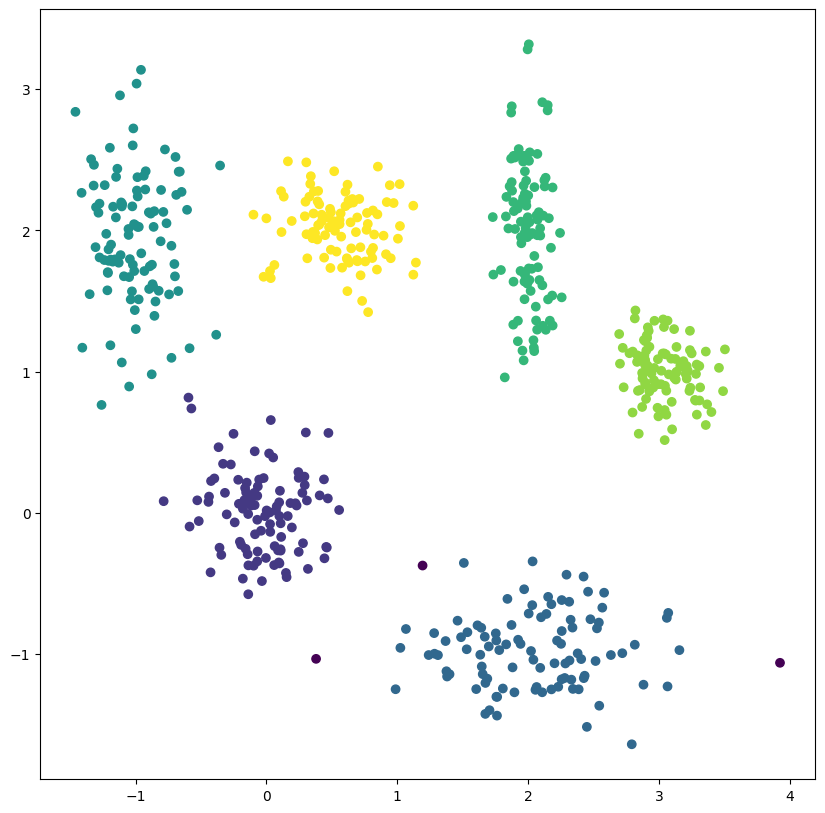

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("clustering.csv", header=None)

points = list(df.values)

from DBSCAN_solution import DBSCAN
labels = DBSCAN(points, 0.45, 10)

plt.figure(figsize=(10, 10))
plt.scatter(*np.array(points).T, c=labels)
plt.show()